# Research Notebook
## Dana Luke Gheshlaghi
## Date: January 27th, 2025

# 1: Experience
## Describe at least one research activity you worked on this week.

- Watched two lectures on Smoothed Particle Hydrodynamics and Dark Matter
- Messed around with the SPHerical simulation code to understand how it works since it plays a big part in the research for Dissipative Dark Matter
- Attended Research Team Meeting

## Motivation:
SPH stands for Smoothed Particle Hydrodynamics. The purpose of SPHerical is that it simulates the interacting dark matter halos by using spherical symmetry, like a shell around each halo. The lectures are on fluid dynamics, deriving eulers equations, the purpsoe of this is to understand the theory of SPH and what the code is actally doing to get its results. The goal for my team right now is to get a hang of SPHerical package, just understanding how to use it on python.

# 2: What? (What happened?)
## Derived Euler's Equations
Starting off with some intrinsic quantities [1]
- $ \rho = \frac{M}{V} = $ Mass Density
- $ e = E/M$ Specificed Internal Energy
- $ \vec{v} = \frac{\vec{p}}{M} $ Bulk Velocity
- p = pressure
- $ \frac{E}{V} = \frac{E}{M}\frac{M}{V} = e\rho $ Energy Density

We took the time derivative of M which got us our first euler equation the Conservation of Mass. Since we consider mass to be conserved, the volume in study could have fluid/mass entering and leaving. This would result in a flux of mass over time. So we take the derivative to study this.

1.) $ D_t\rho = -\rho \vec{\nabla}\cdot\vec{v} $ [1]

Took the time derivative of momentum along the x-axis giving us the Conservation of Momentum. Considering the volume, as fluid exits the sphere momentum would be lost as they travel away, this is data we must keep track of.

2.) $ D_t\vec{v} = -\vec{\nabla}\Phi - \frac{1}{\rho}\vec{\nabla} $ [1]
    
Taking the time derivative of the internal kinetic energy denoted 'E' and the bulk energy of the fluid $ \frac{1}{2}\frac{|\vec{p}|^2}{M} $ which gives us the Conservation of Energy. Same as mass and momentum, energy loss/gain is possible when the fluid leaves the boundary of the sphere which we can follow.

3.) $ D_t\vec{v} = -\frac{P}{\rho} \vec{\nabla}\cdot\vec{v} $ [1]


Additionally, professor Tulin gave us a tutorial for SPHerical where we got to simulate the dark matter and create shells that studied it over time, like its energy/heat, or its position/expansion. Since its a lot of code, I will copy and paste the initial data being created, the code to plot it (skipping the long code of work to get it), as well as displaying the plots. This is all code made by professor Tulin from [4].

```
# Define initial density profile
rho_s, rs = 72800555.87, 0.166793713
rho = density('tNFW',rho_s,rs)

# Define rmin and rmax for shells
rmin, rmax = 0.001*rs, 100*rs

# Create shells for CDM halo
cdm = SPH.create_shells(rho, rmin, rmax)

# Create shells for SIDM halo
interaction = {'type':'selfinteractions', 'params':[5]}
sidm = SPH.create_shells(rho, rmin, rmax, interaction=interaction)
```

```
# Loading and plotting solution
sol = SPH.solution("dsidm_test")

# Plot innermost 20 shell positions vs time
for i in range(20):
    
    plt.plot(sol.time,sol.r(i))

plt.yscale('log')
plt.xlabel('time (Gyr)')
plt.ylabel('r (kpc)')
plt.show()

# Plot innermost 20 shell specific energies vs time
for i in range(20):
    
    plt.plot(sol.time,sol.e(i))

plt.yscale('log')
plt.xlabel('time (Gyr)')
plt.ylabel('e (km/s)^2')
plt.show()

# Plot density profile snapshots
for t_snap in [0,0.05,0.1]:
    
    halo_snap = sol.t(t_snap)
    plt.loglog(halo_snap.r, halo_snap.density,label= 't=%s' % str(t_snap))
    
plt.xlabel('r (kpc)')
plt.ylabel('density (Msol/kpc^3)')
plt.legend()
plt.show()
```

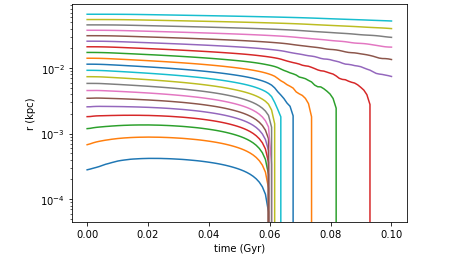

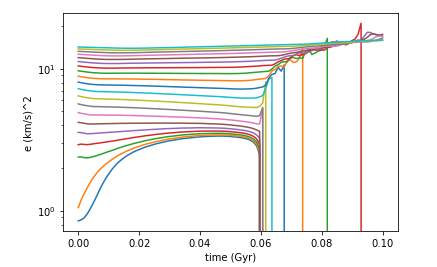

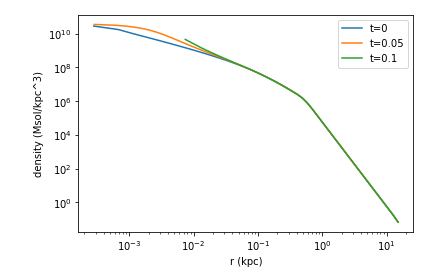


# 3: So what? (What does it mean?)
## Describe your results
__Studying a Spherical Volume__

Using SPHerical, we surround the DM particles with a sphere where can track its properties as time progresses giving us data on their properties. [2] It is important to understand the theory of fluid dynamics, especially for me since I have not taken a course on it yet because it is the basis of Smoothed Spherical Hydrodynamics. In this model, SIDM (self interacting dark matter) is considered as spherically-symmetric fluid where elastic self-interactions are modeled by heat conduction [2]. To do this, SPH turns particles into very small fluid parcels that move as a whole. This bulk fluid is free to move, and we study a concentric shell around it.

Professor Tulin gave a great example of why this is useful. Think of some particles scattered in space there will be pockets where they are dense, and others not so much, parts of the whole scattered particles may even have empty space. If we take a shell around some particles, then take another one with a greater radius, or even a smaller one, the information we collect could change drastically like the density. Smoothing out the particles, we get a ore detailed result, particles that may not exactly lie inside the shell still give us some data due to the drop off being accounted for.

That was what I got from the first two videos and the paper from [1] and [2], [4] was taking that data and actually using SPHerical in practice by simulating the dark matter halos, taking shells of the dark matter and studying its behaviour.




# 4. Now what? (What's next?)
## Plan for the next week

I could only finish 2 lectures out of the assigned 5, as well I got to mess around with the code SPHerical but did not make any progress in doing anything with it yet.

To do list:
- Watch and write notes on the next two lecture videos. Titles are "SOH with Spherical Sym" and Dark Matter Interactions. The first two parts which I completed in the first 3 videos are still theory building up to how they will pplay a role in studying Dark Matter
- I need to code the decay interaction formulas from [?] which are

    - $ \frac{d m^*_i}{dt} = - \Gamma_2 m_i^* $ [3]
    - $ \frac{dm_i}{dt} = \Gamma_2 \sum_j T_{ij} m_j^* $ [3]
    - $ \frac{d v_i}{dt} = \Gamma_2 \sum_j T_{ij} \frac{\rho^*_j}{\rho_i} \left( v_j^* - v_i \right) + ... $ [3]
    - $ \frac{d e_i}{dt} = \Gamma_2 \sum_j T_{ij}  \frac{\rho_j^*}{\rho_i} \Big( \tfrac{1}{2} \delta^2 + \tfrac{1}{2} (v_i - v_j^*)^2 + (e_j^* - e_i) \Big) + ... $ [3]
- I need to read more extensivley on the two papers in reference [?] and [?] as they better explain the full encompasing goal of what SPHerical will help with
- I should also read more on what Dark Matter since it is a huge topic still new to me. I'll attempt to read more papers by professor Tulin and see if he has any resources that may aid me

# 5. Bibliography

[1] S. Tulin *Lecture 1, Lecture 2* https://drive.google.com/drive/folders/1EkPePcG7itxzHtS42bgpMsvcAANswK78

[2] S. Tulin, R. Blaff, Y. Han, H. Vormann *Smoothed Shell Hydrodynamics Simulations for Interacting Dark Matter Halos Draft* https://drive.google.com/drive/folders/1EkPePcG7itxzHtS42bgpMsvcAANswK78

[3] S. Tulin *Dissipative dark matter interactions* (Privated document on Overleaf)

[4] S. Tulin *Dissipative-Dark-Halos* https://github.com/dark-physics/dissipative-dark-halos